# Hand Write & Use Sciket-Learn Navie Bayes Classifier / PCA / Kmeans Clustering on MNIST

## Navie Bayes（Classification, Based on Probability Theory）
- Pros：在数据较少的情况下仍然有效，可以处理多分类问题。
- Cons：对于输入数据的准备方式较为敏感。
- 适用数据类型：标称型数据。

In [177]:
#文档头文件
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.naive_bayes import GaussianNB

### 准备数据：使用像素特征来表示图像

In [4]:
#导入mnist数据集：https://www.openml.org/d/554
#并观察mnist数据集的大小
mnist = datasets.fetch_openml('mnist_784')
data, target = mnist.data, mnist.target
data.shape, target.shape

((70000, 784), (70000,))

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

'5'

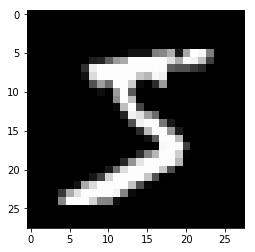

In [10]:
#观察数据样本
plt.gray()
print(data[0].reshape(28,28))
plt.imshow(data[0].reshape(28, 28))
target[0]

In [189]:
#对图片像素二值化，变成0-1分布
#对图片sample的像素特征构建成更显著的标称型数据
def normalize(data):
    sample_num, img_size= data.shape
    for i in range(sample_num):
        for j in range(img_size):
            if int(data[i, j]) != 0:
                data[i,j] = 1
            else:
                data[i,j] = 0
    return data

data = normalize(data).astype(int)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 

'5'

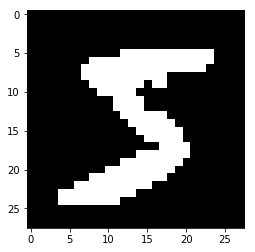

In [50]:
#观察二值化处理后的数据样本
plt.gray()
print(data[0].reshape(28,28))
plt.imshow(data[0].reshape(28, 28))
target[0]

In [ ]:
#另一种二值化的方法：使用均值来做二值化
def normalize_mean(data):
    sample_num, img_size= data.shape
    for i in range(sample_num):
        img_pixel_mean = data[i].mean()
        data[i] = np.array([0 if i < img_pixel_mean else 1 for i in data[i]])
    return data

data_mean = normalize_mean(data).astype(int)

In [53]:
#生成一个随机数组
indx = np.random.choice(len(target), len(target), replace=False)

#构建一定长度大小的新 data 和 target 数组
def mk_dataset(size, data, target):
    train_img = [data[i] for i in indx[:size]]
    train_img = np.array(train_img)
    test_img = [target[i] for i in indx[:size]]
    test_img = np.array(test_img)
    
    return train_img, test_img

In [54]:
#使用随机数组划分得到60000个训练集，10000个测试集
sixty_x, sixty_y = mk_dataset(60000, data, target)
sixty_x.shape, sixty_y.shape

((60000, 784), (60000,))

In [143]:
test_img = [data[i] for i in indx[-10000:]]
test_img_np = np.array(test_img)
test_target = [target[i] for i in indx[-10000:]]
test_target_np = np.array(test_target)
test_img_np.shape, test_target_np.shape

((10000, 784), (10000,))

### 训练算法：从二值化后的像素特征来计算概率

$P(c_i|w) = \frac{p(w|ci)p(ci)}{p(w)}$


- $p(ci)$ 先验概率：minst手写字体图片对应的label，共10个类别（0～9）
- $p(w|c_i)$ 条件概率：该label下对应的feature的概率
- $p(c_i|w)$ 后验概率：给出一个新的图片向量矩阵feature，计算其属于label（0~9）的概率

In [171]:
class naviebayes():
    def train(self, feature, label):
        #样本数和特征数
        sample_num, feature_dimension = feature.shape;
        label_counter = Counter(label)
        self.label_size = len(list(label_counter))
        label_sort = list(label_counter)
        label_sort.sort()      #对标记的统计结果按照字符串的顺序进行重新排列（0到9）  

        #先验概率
        self.prior_probability = np.array([label_counter[label_sort[i]]/sample_num for i in range(self.label_size)])

        #后验概率
        poster_num = np.empty((self.label_size, feature_dimension))
        self.poster_probability = np.empty((self.label_size, feature_dimension))
        for one_label in range(self.label_size):
            poster_num[one_label] = feature[np.where(label == one_label)].sum(axis=0)
            #拉普拉斯平滑
            self.poster_probability[one_label] = (poster_num[one_label]+1)/(label_counter[one_label]+2)

        return self.prior_probability, self.poster_probability

    def predict(self, feature, label):
        #样本数和特征数
        sample_num, feature_dimension = feature.shape;
        pred = np.empty(sample_num)
        for one_sample in range(sample_num):
            prob = np.empty(self.label_size)
            for one_label in range(self.label_size):
                temp = sum([math.log(1-self.poster_probability[one_label][one_pixel]) \
                            if feature[one_sample][one_pixel] == 0 \
                            else math.log(self.poster_probability[one_label][one_pixel]) \
                            for one_pixel in range(feature_dimension)])
            pred[one_sample] = np.argmax(prob)
        return pred, sum(1 for a, b in zip(pred.astype(int), label.astype(int)) if a == b) / sample_num
            

In [172]:
nb = naviebayes()
prior_probability, poster_probability = nb.train(sixty_x, sixty_y)
pred, accuary = nb.predict(test_img_np, test_target_np)

/Users/fangn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [182]:
print(classification_report(test_target_np.astype(int), pred))
print("accuary: ", accuary)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       970
           1       0.00      0.00      0.00      1122
           2       0.00      0.00      0.00       978
           3       0.00      0.00      0.00       992
           4       0.10      0.52      0.17      1005
           5       0.00      0.00      0.00       894
           6       0.00      0.00      0.00       983
           7       0.10      0.50      0.17      1050
           8       0.00      0.00      0.00      1033
           9       0.00      0.00      0.00       973

   micro avg       0.10      0.10      0.10     10000
   macro avg       0.02      0.10      0.03     10000
weighted avg       0.02      0.10      0.04     10000

accuary:  0.1046


/Users/fangn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 使用sklearn实现训练算法

In [186]:
model = GaussianNB()
model.fit(sixty_x, sixty_y)
pred = model.predict(test_img_np)
print(classification_report(test_target_np, pred))

              precision    recall  f1-score   support

           0       0.55      0.87      0.67       970
           1       0.88      0.91      0.90      1122
           2       0.80      0.22      0.34       978
           3       0.69      0.29      0.40       992
           4       0.78      0.10      0.18      1005
           5       0.70      0.03      0.07       894
           6       0.55      0.97      0.70       983
           7       0.88      0.28      0.42      1050
           8       0.35      0.62      0.45      1033
           9       0.36      0.95      0.53       973

   micro avg       0.53      0.53      0.53     10000
   macro avg       0.65      0.52      0.47     10000
weighted avg       0.66      0.53      0.47     10000



## Kmeans Clustering
- Pros：容易实现
- Cons：可能收敛到局部最小值，在大规模数据集上收敛较慢。
- 适用数据类型：数值型数据。

### 手写源码实现 Kmeans

In [271]:
class hand_kmeans():
    #计算欧式距离
    def dist_eclud(vec_a, vec_b):
        return np.sqrt(np.sum(np.power(vec_a - vec_b, 2)))
    
    #随机选取质心
    def rand_cent(data_set, k):
        dataset_dimension = np.shape(data_set)[1]
        center = np.mat(np.zeros((k, dataset_dimension)))
        for dimension in range(dataset_dimension):     #按维度进行计算,在该维度现有值的范围内随机选取一个中间值
            min_dimen = min(data_set[:, dimension])
            max_dimen = max(data_set[:, dimension])
            center[:, dimension] = min_dimen + float(max_dimen - min_dimen) * np.random.rand(k,1)
        return center
    
    #训练
    def fit(self, data_set, k, dist_method=dist_eclud, cent_method=rand_cent):
        #样本数
        sample_count = np.shape(data_set)[0]
        #结束迭代标记
        is_change = True                          
        keep_result = np.mat(np.zeros((sample_count, 2)))  
        #质心
        center_roids = cent_method(data_set, k)    
        while is_change:
            is_change = False
            for sample_index in range(sample_count):
                #初始最小值和最小的k类
                min_dist, min_index = np.Inf, -1    
                for j in range(k):
                    #计算该sample到k类质心的距离
                    dist_j = dist_method(data_set[sample_index,:], center_roids[j,:]) 
                    #更新最小值和最小的k类
                    if dist_j< min_dist:            
                        min_dist , min_index = dist_j , j
                #迭代结束判断
                if keep_result[sample_index, 0] != min_index:   
                    is_change = True
                keep_result[sample_index,:] = min_index, min_dist**2   
            #更新质心
            for cent_index in range(k):
                temp_cluster = data_set[np.nonzero(keep_result[:,0].A==cent_index)[0]]
                center_roids[cent_index,:] = np.mean(temp_cluster, axis=0)
        #返回所有sample的min_index和min_dist
        #其实可以不用再用
        return  keep_result

In [272]:
model = hand_kmeans()
pred = model.fit(test_img_np, 10)
print(pred[:20])

[[ 6.         54.17985833]
 [ 8.         54.6309746 ]
 [ 1.         46.52798462]
 [ 9.         53.31532997]
 [ 2.         83.89559011]
 [ 3.         79.61099982]
 [ 4.         17.05745848]
 [ 5.         94.99840165]
 [ 9.         52.9474621 ]
 [ 1.         48.65413846]
 [ 9.         48.83334799]
 [ 1.         62.13875385]
 [ 6.         47.0590298 ]
 [ 8.         86.17724326]
 [ 6.         48.58492163]
 [ 4.         18.98132945]
 [ 5.         68.33110307]
 [ 4.         23.955523  ]
 [ 8.         61.39515371]
 [ 8.         49.82948207]]


### 使用 sklearn 实现

In [273]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=10)
clf.fit(sixty_x)
pred = clf.predict(test_img_np)
print(pred[:20])

[0 4 7 2 5 4 3 0 1 1 1 7 5 8 0 3 0 3 4 4]


## PCA
- Pros：降低数据的复杂性，识别最重要的多个特征
- Cons：不一定需要，且可能损失有用信息
- 适用数据类型：数值型数据

### 手写源码实现 PCA

In [289]:
def pca(data_mat, top_n_feat=99999999):
    """ 
    主成分分析：  
    输入：矩阵data_mat ，其中该矩阵中存储训练数据，每一行为一条训练数据  
         保留前n个特征top_n_feat，默认全保留
    返回：降维后的数据集和原始数据被重构后的矩阵（即降维后反变换回矩阵）
    """  

    # 获取数据条数和每条的维数 
    num_data,dim = data_mat.shape  
    print(num_data)  # 10000 
    print(dim)   # 784

    # 数据中心化，即指变量减去它的均值
    mean_vals = data_mat.mean(axis=0)  #shape:(784,)
    mean_removed = data_mat - mean_vals # shape:(10000, 784)

    # 计算协方差矩阵（Find covariance matrix）
    cov_mat = np.cov(mean_removed, rowvar=0) # shape：(784, 784)

    # 计算特征值(Find eigenvalues and eigenvectors)
    eig_vals, eig_vects = np.linalg.eig(np.mat(cov_mat)) # 计算特征值和特征向量，shape分别为（784，）和(784, 784)

    eig_val_index = np.argsort(eig_vals)  # 对特征值进行从小到大排序，argsort返回的是索引，即下标

    eig_val_index = eig_val_index[:-(top_n_feat + 1) : -1] # 最大的前top_n_feat个特征的索引
    # 取前top_n_feat个特征后重构的特征向量矩阵reorganize eig vects, 
    # shape为(784, top_n_feat)，top_n_feat最大为特征总数
    reg_eig_vects = eig_vects[:, eig_val_index] 
    
    # 将数据转到新空间
    low_d_data_mat = mean_removed * reg_eig_vects # shape: (100, top_n_feat), top_n_feat最大为特征总数
    recon_mat = (low_d_data_mat * reg_eig_vects.T) + mean_vals # 根据前几个特征向量重构回去的矩阵，shape:(100, 784)
    
    return low_d_data_mat, recon_mat

In [315]:
low_d_feat_imgs, recon_mat_imgs = pca(test_img_np, 300)
print(low_d_feat_imgs.shape)
print(recon_mat_imgs.shape)

10000
784
(10000, 300)
(10000, 784)


/Users/fangn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


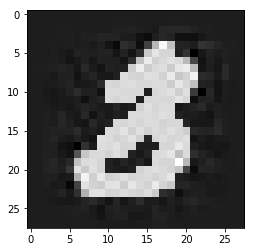

In [316]:
plt.imshow(recon_mat_imgs.astype(float)[0].reshape(28, 28))

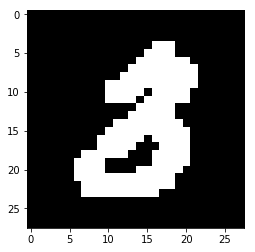

In [317]:
plt.imshow(test_img_np[0].reshape(28,28))

### 适用 sklearn 实现 PCA

In [319]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
pca.fit(test_img_np)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

/Users/fangn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


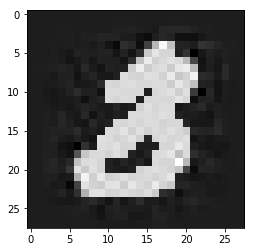

In [320]:
plt.imshow(recon_mat_imgs.astype(float)[0].reshape(28, 28))